In [1]:
from google.colab import drive

drive.mount('/content/drive')
import pandas as pd

data = pd.read_csv('drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')

Mounted at /content/drive


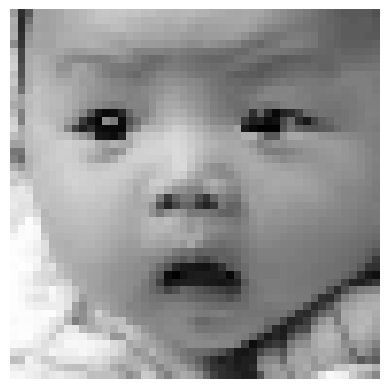

In [2]:
import keras
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
#from keras_applications.resnext import ResNeXt50
#from keras.utils.data_utils import get_file
#import face_recognition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

df1 = pd.DataFrame(data)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '), dtype='float32'), (48, 48)))
df1['pixels'] = df1['pixels'] / 255
X = np.zeros(shape=(23705, 48, 48))
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]

im = df1['pixels'][1]
im
plt.imshow(im, cmap='gray')
plt.axis('off')

# Age
Y_regression = df1["age"].values

In [3]:
'''
#Gender

g = df1['gender']
g = np.array(g)
g.shape
(23705,)
labels_f = []

i = 0
while i < len(ag):
    label = []
    label.append([ag[i]])
    label.append([g[i]])
    labels_f.append(label)
    i+=1
'''

"\n#Gender\n\ng = df1['gender']\ng = np.array(g)\ng.shape\n(23705,)\nlabels_f = []\n\ni = 0\nwhile i < len(ag):\n    label = []\n    label.append([ag[i]])\n    label.append([g[i]])\n    labels_f.append(label)\n    i+=1\n"

In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Split the data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_regression, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25)

# Normalize the input data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Create a Sequential model for VGG-like architecture
model = Sequential()

# Block 1
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

# Output layer with linear activation for regression
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer, mean squared error loss, and metric for regression
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         
 g2D)                                                   

In [5]:
# Train the model
hist = model.fit(X_train, Y_train, epochs=30, batch_size=64, validation_data=(X_val, Y_val))

# Obtain predicted values on the test set
predicted_values = model.predict(X_test)

Epoch 1/30
223/223 [==============================] - 14s 29ms/step - loss: 554.9285 - mae: 17.9874 - val_loss: 405.3519 - val_mae: 15.5104
Epoch 2/30
223/223 [==============================] - 8s 34ms/step - loss: 397.5874 - mae: 15.2928 - val_loss: 405.3148 - val_mae: 15.8426
Epoch 3/30
223/223 [==============================] - 7s 32ms/step - loss: 400.0820 - mae: 15.3755 - val_loss: 403.8262 - val_mae: 15.5754
Epoch 4/30
223/223 [==============================] - 7s 29ms/step - loss: 396.7207 - mae: 15.3100 - val_loss: 405.3960 - val_mae: 15.4344
Epoch 5/30
223/223 [==============================] - 6s 25ms/step - loss: 397.0968 - mae: 15.3244 - val_loss: 421.5356 - val_mae: 15.2492
Epoch 6/30
223/223 [==============================] - 5s 23ms/step - loss: 397.5970 - mae: 15.3194 - val_loss: 403.6042 - val_mae: 15.4962
Epoch 7/30
223/223 [==============================] - 5s 25ms/step - loss: 395.6129 - mae: 15.3113 - val_loss: 402.5955 - val_mae: 15.5683
Epoch 8/30
223/223 [======

149/149 [==============================] - 2s 7ms/step - loss: 1501.3345 - mae: 33.3635
Mean Absolute Error on Test Set: 33.36347198486328


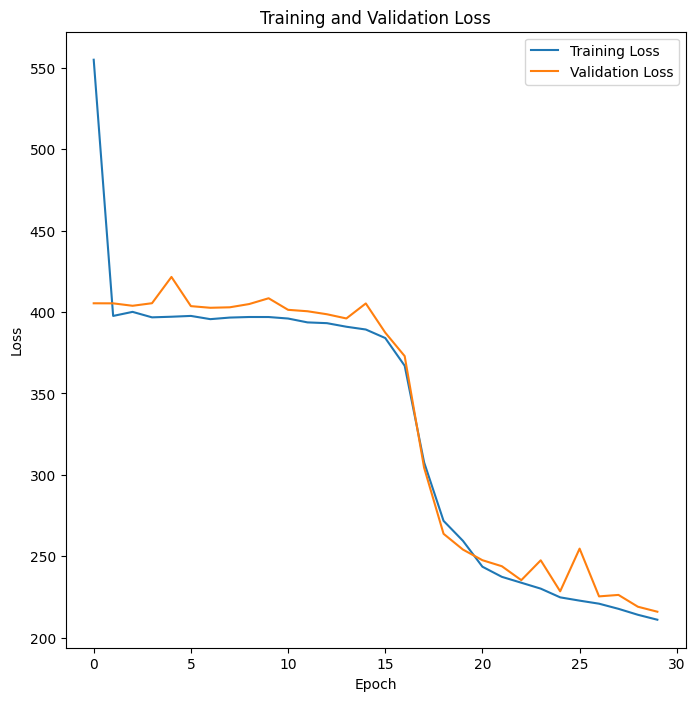

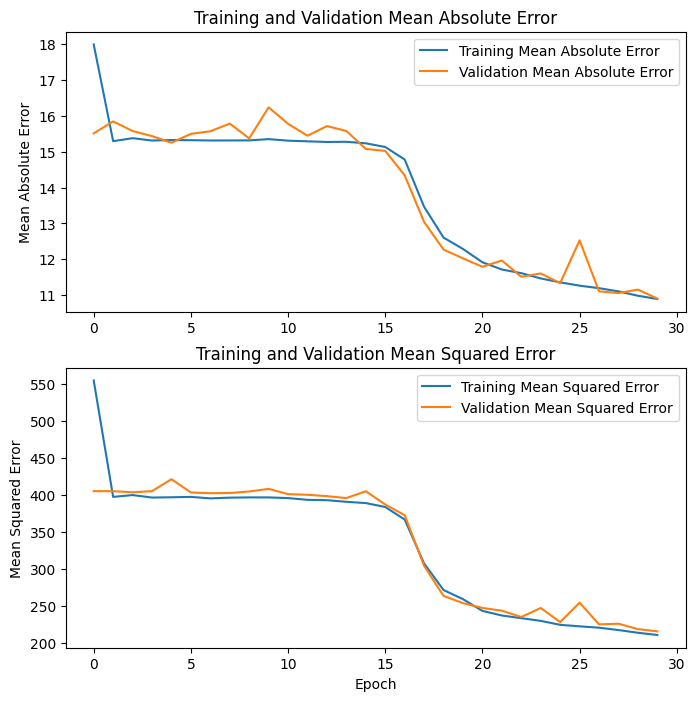

In [8]:
# Evaluate the model
loss, mae = model.evaluate(X_test, Y_test)
print(f"Mean Absolute Error on Test Set: {mae}")


# Plot training and validation loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

# Extracting relevant information from the history
acc = hist.history['mae']
val_acc = hist.history['val_mae']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Plotting the graph
plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Mean Absolute Error')
plt.plot(val_acc, label='Validation Mean Absolute Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')

# Plot Training and Validation Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Mean Squared Error')
plt.plot(val_loss, label='Validation Mean Squared Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epoch')

plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_7 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                      

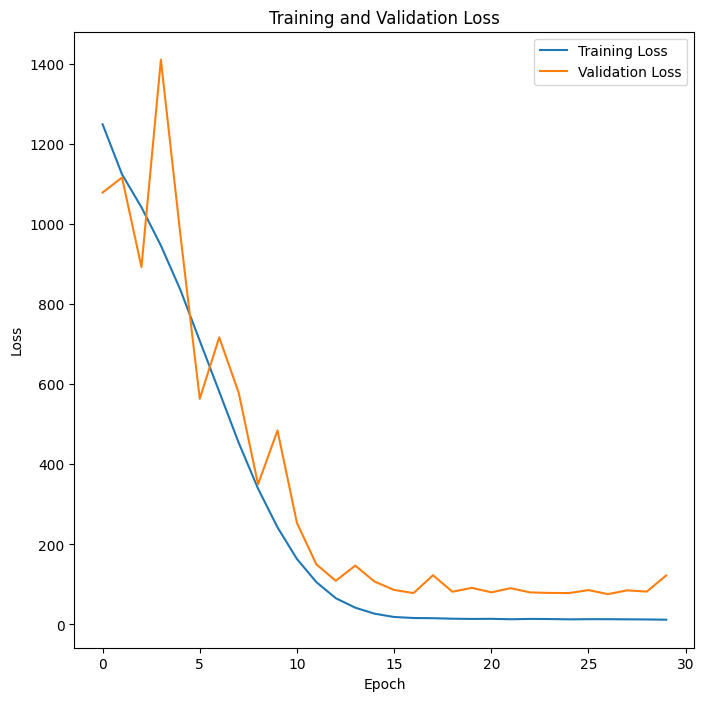

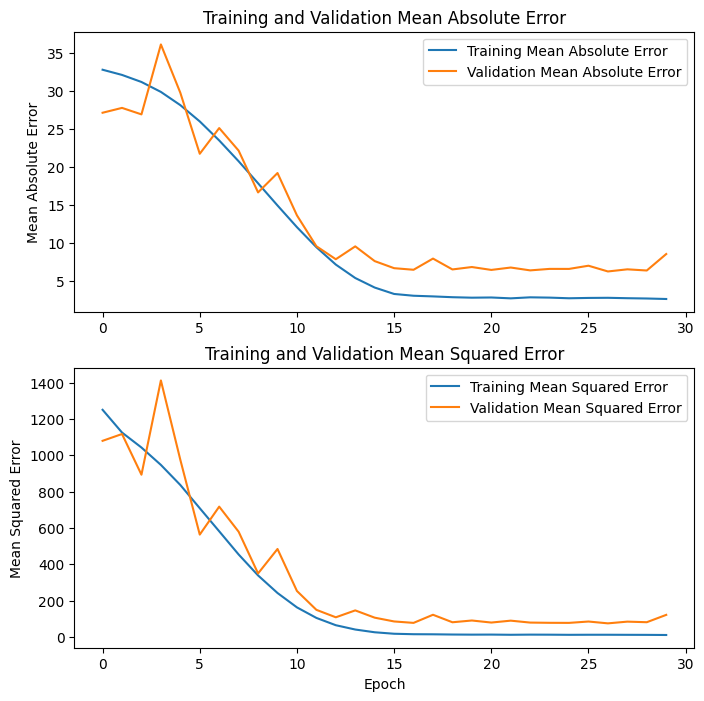

In [9]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
# Create a Sequential model for VGG-like architecture with Batch Normalization
model = Sequential()

# Block 1 with Batch Normalization
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2 with Batch Normalization
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layers with Batch Normalization
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

# Output layer with linear activation for regression
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer, mean squared error loss, and metric for regression
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model
hist = model.fit(X_train, Y_train, epochs=30, batch_size=64, validation_data=(X_val, Y_val))

# Obtain predicted values on the test set
predicted_values = model.predict(X_test)

# Evaluate the model
loss, mae = model.evaluate(X_test, Y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

# Plot training and validation loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

# Extracting relevant information from the history
acc = hist.history['mae']
val_acc = hist.history['val_mae']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Plotting the graph
plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Mean Absolute Error')
plt.plot(val_acc, label='Validation Mean Absolute Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')

# Plot Training and Validation Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Mean Squared Error')
plt.plot(val_loss, label='Validation Mean Squared Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epoch')

plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_13 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)       

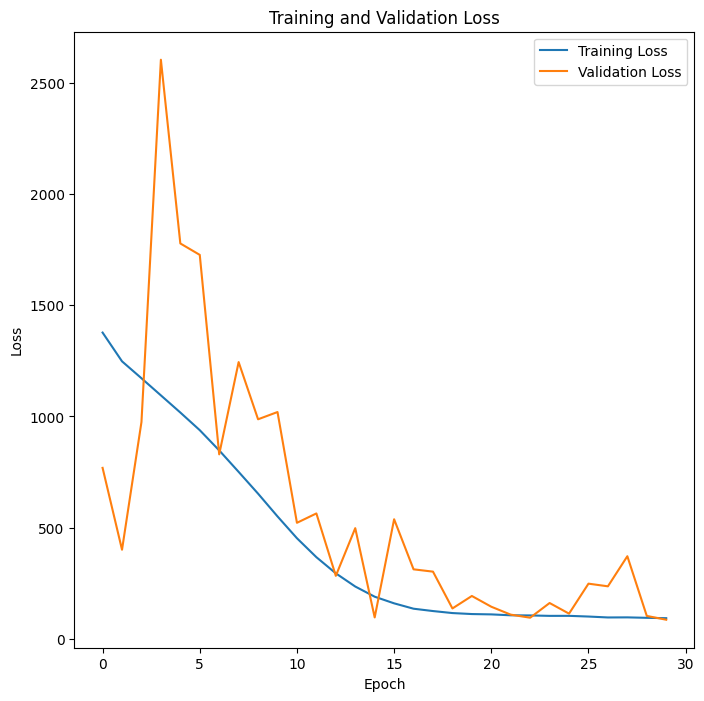

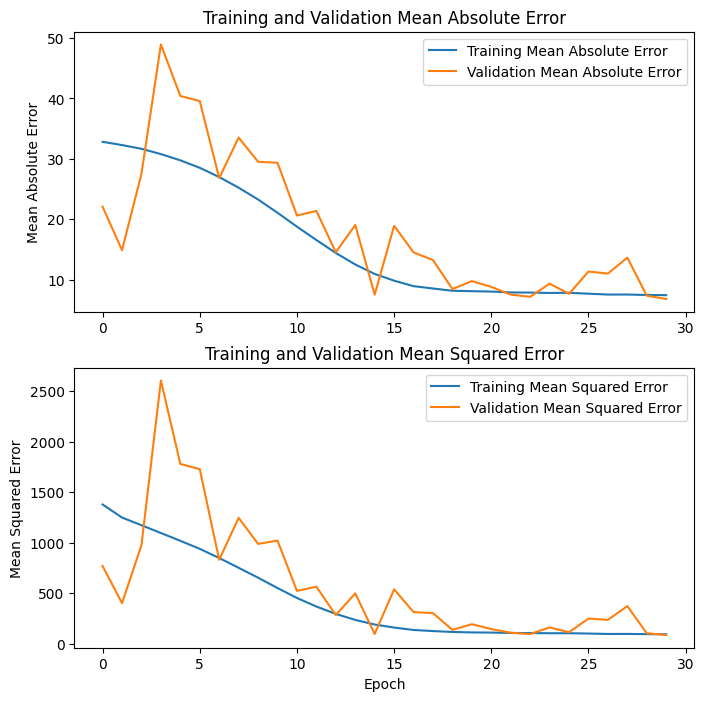

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
# Create a Sequential model for VGG-like architecture with Batch Normalization and Dropout
model = Sequential()

# Block 1 with Batch Normalization and Dropout
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2 with Batch Normalization and Dropout
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layers with Batch Normalization and Dropout
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer with linear activation for regression
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer, mean squared error loss, and metric for regression
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model
hist = model.fit(X_train, Y_train, epochs=30, batch_size=64, validation_data=(X_val, Y_val))

# Obtain predicted values on the test set
predicted_values = model.predict(X_test)

# Evaluate the model
loss, mae = model.evaluate(X_test, Y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

# Plot training and validation loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

# Extracting relevant information from the history
acc = hist.history['mae']
val_acc = hist.history['val_mae']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Plotting the graph
plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Mean Absolute Error')
plt.plot(val_acc, label='Validation Mean Absolute Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')

# Plot Training and Validation Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Mean Squared Error')
plt.plot(val_loss, label='Validation Mean Squared Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epoch')

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_19 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                       

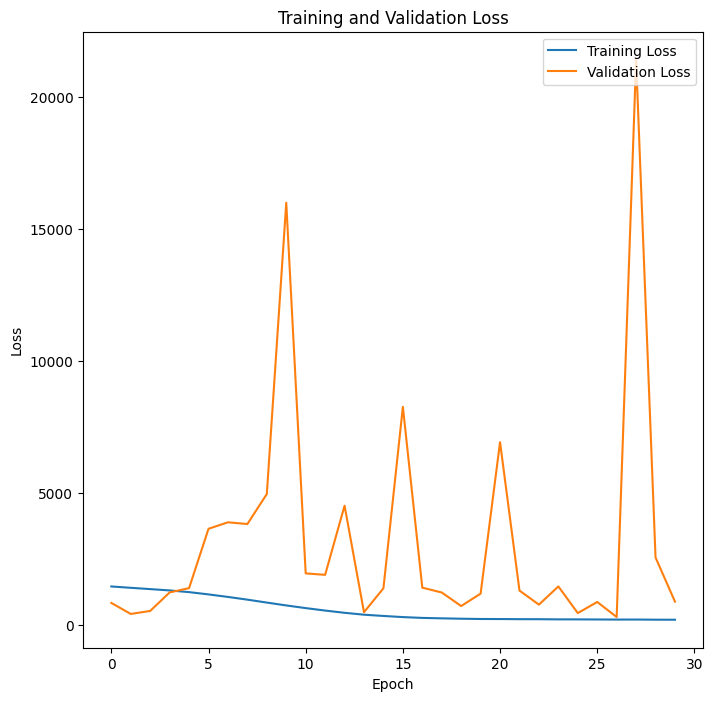

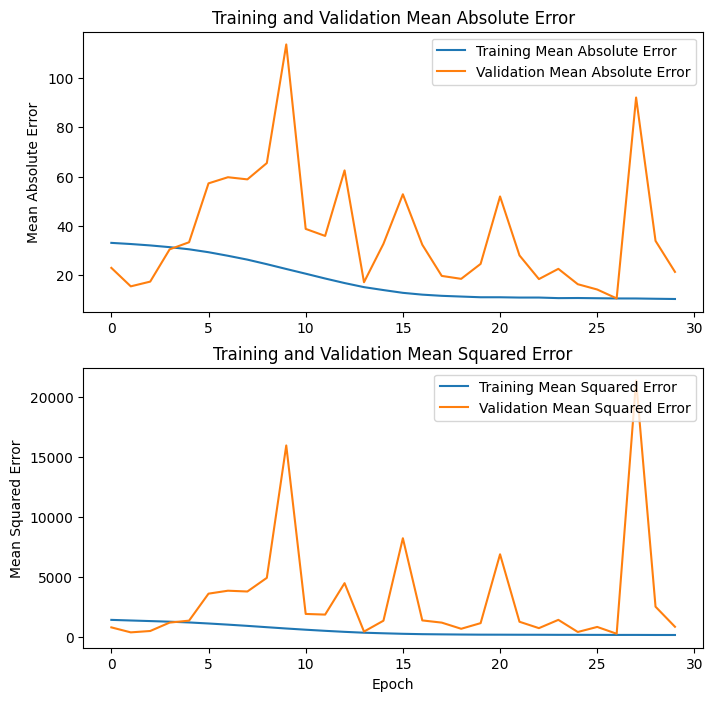

In [11]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.preprocessing.image import ImageDataGenerator

# Load data
data = pd.read_csv('/content/drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')
df1 = pd.DataFrame(data)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '), dtype='float32'), (48, 48)))
df1['pixels'] = df1['pixels'] / 255
X = np.zeros(shape=(23705, 48, 48))
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]

# Age
Y_regression = df1["age"].values

# Split the data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_regression, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25)

# Normalize the input data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Create data generators with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(
    X_train.reshape(X_train.shape[0], 48, 48, 1),  # Reshape for ImageDataGenerator
    Y_train,
    batch_size=64
)

model = Sequential()

# Block 1 with Batch Normalization and Dropout
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2 with Batch Normalization and Dropout
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layers with Batch Normalization and Dropout
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer with linear activation for regression
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer, mean squared error loss, and metric for regression
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

## Train the model using the data generator for the training set and validation data for validation
hist = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 64,
    epochs=30,
    validation_data=(X_val.reshape(X_val.shape[0], 48, 48, 1), Y_val)
)


# Obtain predicted values on the test set
predicted_values = model.predict(X_test)

# Evaluate the model
loss, mae = model.evaluate(X_test.reshape(X_test.shape[0], 48, 48, 1), Y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

# Plot training and validation loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

# Extracting relevant information from the history
acc = hist.history['mae']
val_acc = hist.history['val_mae']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Plotting the graph
plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Mean Absolute Error')
plt.plot(val_acc, label='Validation Mean Absolute Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')

# Plot Training and Validation Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Mean Squared Error')
plt.plot(val_loss, label='Validation Mean Squared Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epoch')

plt.show()

In [12]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


In [13]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_input', 0, 0.5, step=0.1, default=0.5)))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_conv1', 0, 0.5, step=0.1, default=0.5)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_conv2', 0, 0.5, step=0.1, default=0.5)))
    model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_conv3', 0, 0.5, step=0.1, default=0.5)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_dense1', 0, 0.5, step=0.1, default=0.5)))
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_dense2', 0, 0.5, step=0.1, default=0.5)))

    model.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log', default=1e-3))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


<ipython-input-13-4222307c3b5c>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.preprocessing.image import ImageDataGenerator
# Load data
data = pd.read_csv('/content/drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')
df1 = pd.DataFrame(data)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '), dtype='float32'), (48, 48)))
df1['pixels'] = df1['pixels'] / 255
X = np.zeros(shape=(23705, 48, 48))
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]

# Age
Y_regression = df1["age"].values

# Split the data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_regression, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25)

# Normalize the input data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Create data generators with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(
    X_train.reshape(X_train.shape[0], 48, 48, 1),  # Reshape for ImageDataGenerator
    Y_train,
    batch_size=64
)
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,
    directory='hyperparameter_tuning',
    project_name='age_regression'
)

# Define the search space for hyperparameters
tuner.search_space_summary()

Search space summary
Default search space size: 7
dropout_input (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dropout_conv1 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dropout_conv2 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dropout_conv3 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dropout_dense1 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
dropout_dense2 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [15]:
tuner.search(
    train_generator,
    steps_per_epoch=len(X_train) // 64,
    epochs=30,
    validation_data=(X_val.reshape(X_val.shape[0], 48, 48, 1), Y_val),
)

best_hps = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best Hyperparameters:")
print(best_hps)

Trial 10 Complete [00h 07m 49s]
val_mae: 13.935379028320312

Best val_mae So Far: 7.208860397338867
Total elapsed time: 01h 19m 03s
Best Hyperparameters:
{'dropout_input': 0.30000000000000004, 'dropout_conv1': 0.0, 'dropout_conv2': 0.0, 'dropout_conv3': 0.0, 'dropout_dense1': 0.0, 'dropout_dense2': 0.1, 'learning_rate': 0.004737198185425148}


Epoch 1/30
223/223 [==============================] - 14s 44ms/step - loss: 87.7977 - mae: 6.8661 - val_loss: 81409.6094 - val_mae: 133.7393
Epoch 2/30
223/223 [==============================] - 10s 43ms/step - loss: 84.2077 - mae: 6.7613 - val_loss: 81.2104 - val_mae: 6.4387
Epoch 3/30
223/223 [==============================] - 10s 43ms/step - loss: 65.9221 - mae: 6.0163 - val_loss: 76.7734 - val_mae: 6.4101
Epoch 4/30
223/223 [==============================] - 10s 43ms/step - loss: 58.7929 - mae: 5.7049 - val_loss: 78.5333 - val_mae: 6.3718
Epoch 5/30
223/223 [==============================] - 10s 43ms/step - loss: 57.1605 - mae: 5.6475 - val_loss: 82.0452 - val_mae: 6.2981
Epoch 6/30
223/223 [==============================] - 9s 42ms/step - loss: 40.8623 - mae: 4.8395 - val_loss: 133.4182 - val_mae: 6.5752
Epoch 7/30
223/223 [==============================] - 9s 42ms/step - loss: 31.8461 - mae: 4.2908 - val_loss: 441.1338 - val_mae: 7.2193
Epoch 8/30
223/223 [=======================

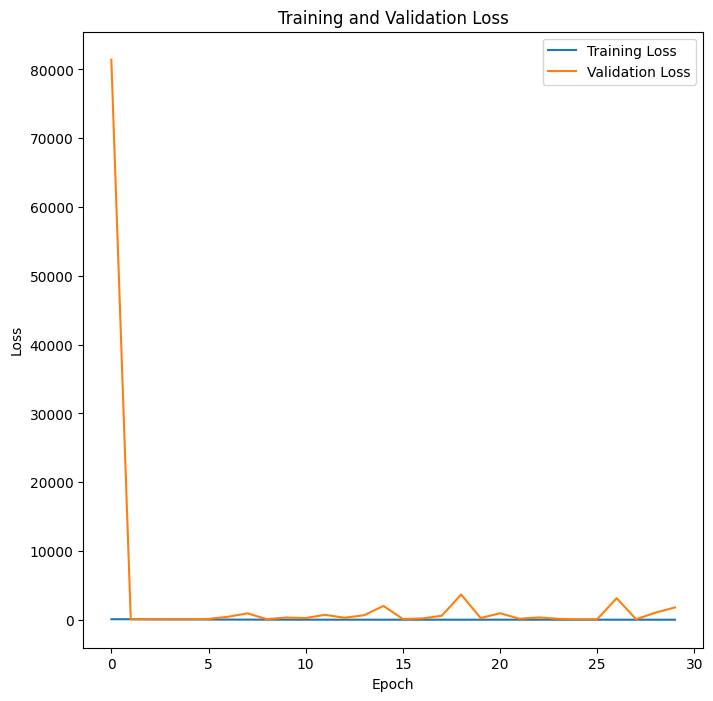

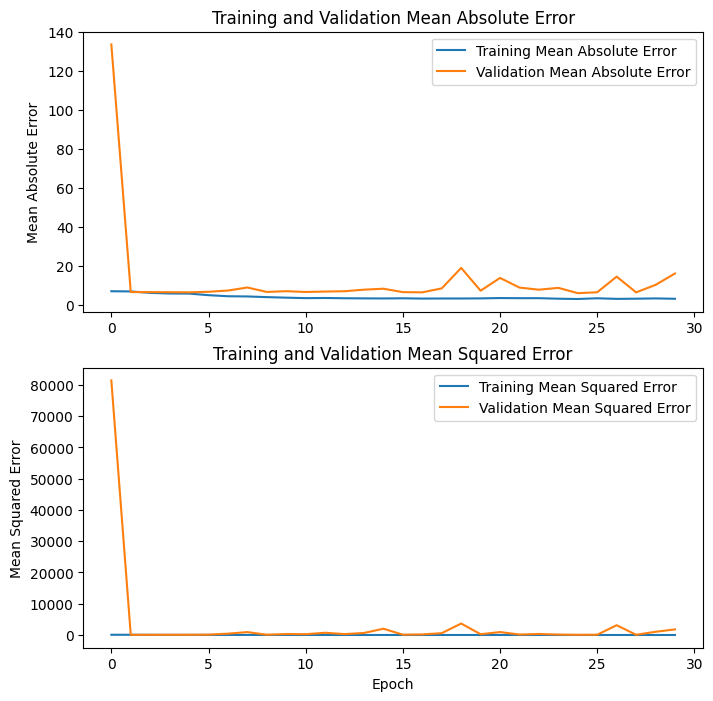

In [16]:
best_model = tuner.get_best_models(num_models=1)[0]
hist = best_model.fit(
    X_train.reshape(X_train.shape[0], 48, 48, 1),
    Y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val.reshape(X_val.shape[0], 48, 48, 1), Y_val)
)

# Evaluate the model
loss, mae = best_model.evaluate(X_test.reshape(X_test.shape[0], 48, 48, 1), Y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

# Plot training and validation loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')

# Extracting relevant information from the history
acc = hist.history['mae']
val_acc = hist.history['val_mae']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Plotting the graph
plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Mean Absolute Error')
plt.plot(val_acc, label='Validation Mean Absolute Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')

# Plot Training and Validation Loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Mean Squared Error')
plt.plot(val_loss, label='Validation Mean Squared Error')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epoch')

plt.show()